In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

sns.set({"figure.figsize":(12,8)})

In [2]:
file_name = r"C:\Users\user\Videos\Datasets\Time Series Practice Datasets\energydata_complete.csv"
energy_data = pd.read_csv(file_name)

In [3]:
energy_data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
energy_data["date"] = pd.to_datetime(energy_data["date"])

In [6]:
energy_data["date"].dtype

dtype('<M8[ns]')

In [7]:
energy_data.isnull().values.sum()

0

In [8]:
energy_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [9]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
# For purpose of time series modelling, since I cant take too many features into the LSTM model, 
# I would engineer new features that would take the present ones into consideration, 
# such as averaging the total temperature or relative humidities

energy_data["Temperature"] = (energy_data["T1"] + energy_data["T2"] + energy_data["T3"] + energy_data["T4"] +
                                     energy_data["T5"] + energy_data["T6"] + energy_data["T7"] + energy_data["T8"] +
                                     energy_data["T9"] + energy_data["T_out"]) / 10

energy_data["Rel_Hum"] = (energy_data["RH_1"] + energy_data["RH_2"] + energy_data["RH_3"] + energy_data["RH_4"] + 
                                     energy_data["RH_5"] + energy_data["RH_6"] + energy_data["RH_7"] + energy_data["RH_8"] +
                                     energy_data["RH_9"] + energy_data["RH_out"]) / 10

energy_data["rv_mean"] = (energy_data["rv1"] + energy_data["rv2"]) / 2

In [11]:
energy_data["Temperature"].head()

0    16.110667
1    16.083000
2    16.030000
3    15.985333
4    15.977000
Name: Temperature, dtype: float64

In [12]:
data = energy_data.drop(columns = ['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out','rv1', 'rv2'])

In [13]:
data = data.drop("RH_out", axis = 1)

### Data Visualisation

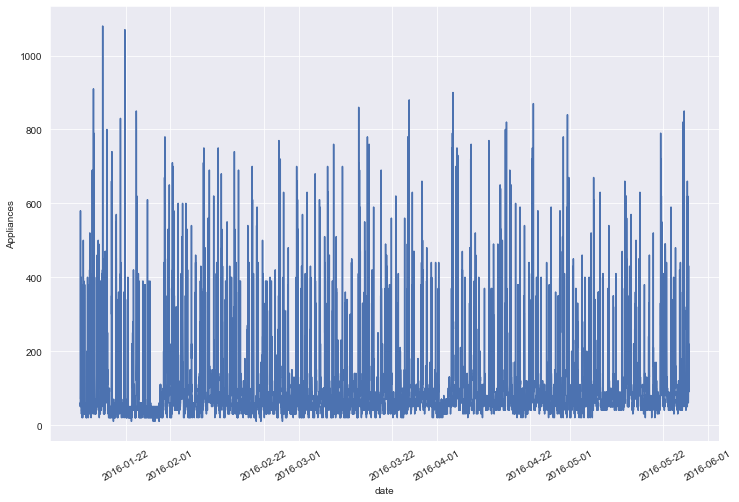

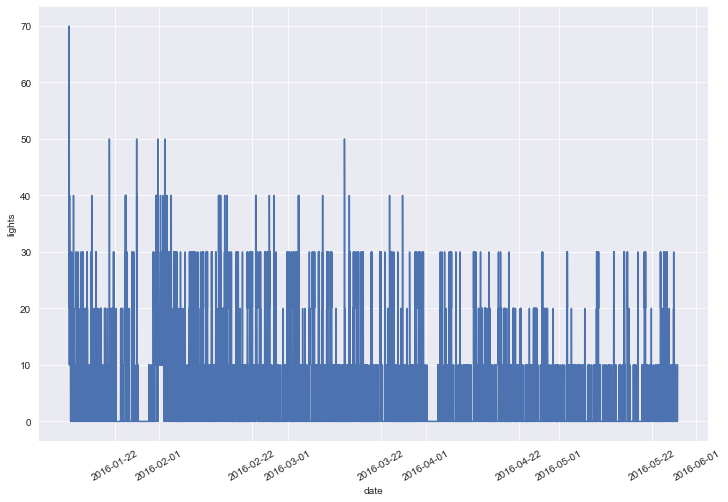

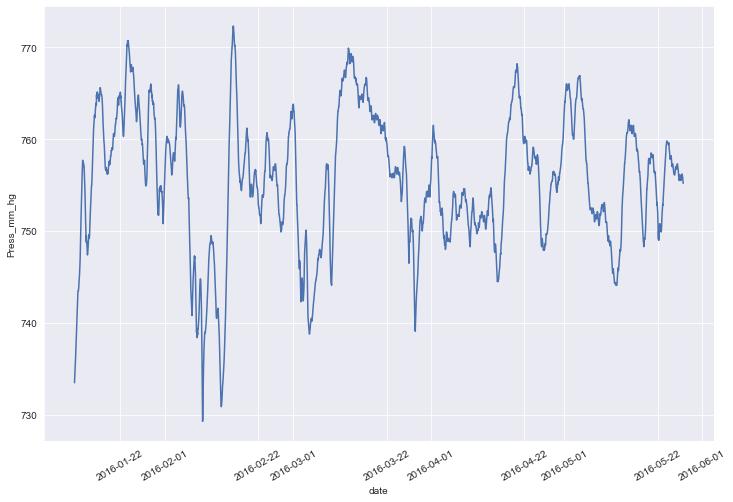

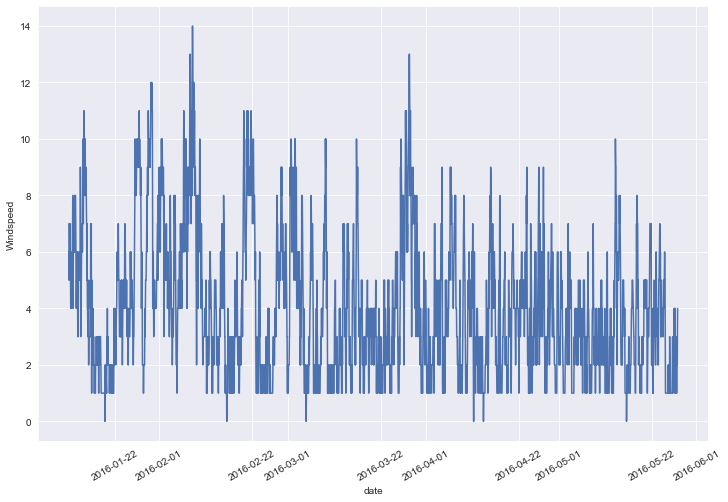

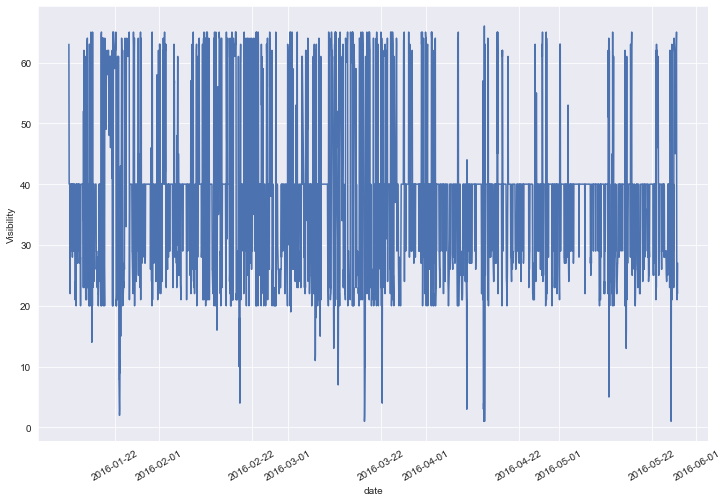

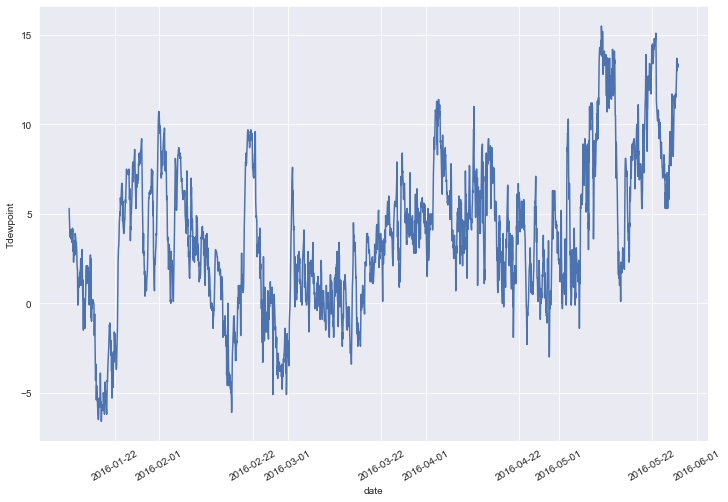

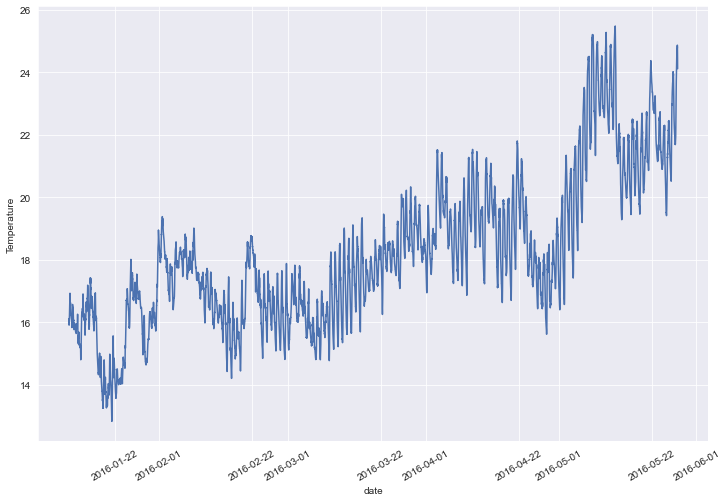

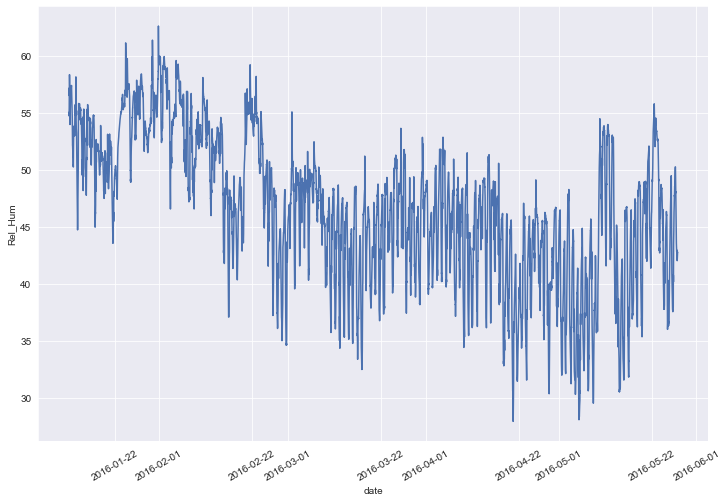

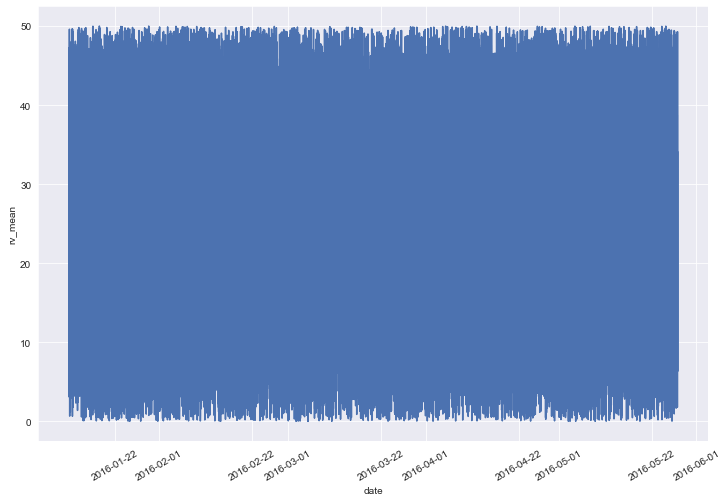

In [14]:
# This is to allow us to view the relationship between the various features to beutilise for the model and time

# There are noticeable spikes in appliance usage early in the year or winter period cos of the relative darkness and Cold
# Light usage is also more at the beginning of the year due to relative darkness of winter and colder periods
# There are visible spikes at the beginning of each month in pressure and the pressure gradually build into the summer periods
# Temperature and dew point are increasing towards the summer periods, having their lowest at the beginning of the year 
# The ranges of windspeed also descreases towards the summer periods and higher at the beginning of the year
# Reletive Humidity shows a decrease into the summer, hotter periods of the year, peaking at the beginning of the year

for i in [i for i in data.columns if i != "date"]:
    sns.lineplot(x = "date", y = i, data = data)
    plt.xticks(rotation = 30)
    plt.show()

In [56]:
import plotly.express as px

In [57]:
fig = px.line(energy_data, x = "date", y = "Rel_Hum", title = "Relative_Humidity_chart_with_slider")

fig.update_xaxes(rangeslider_visible = True)
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0.5, 1.0, 'Weekly_Time_Lag')

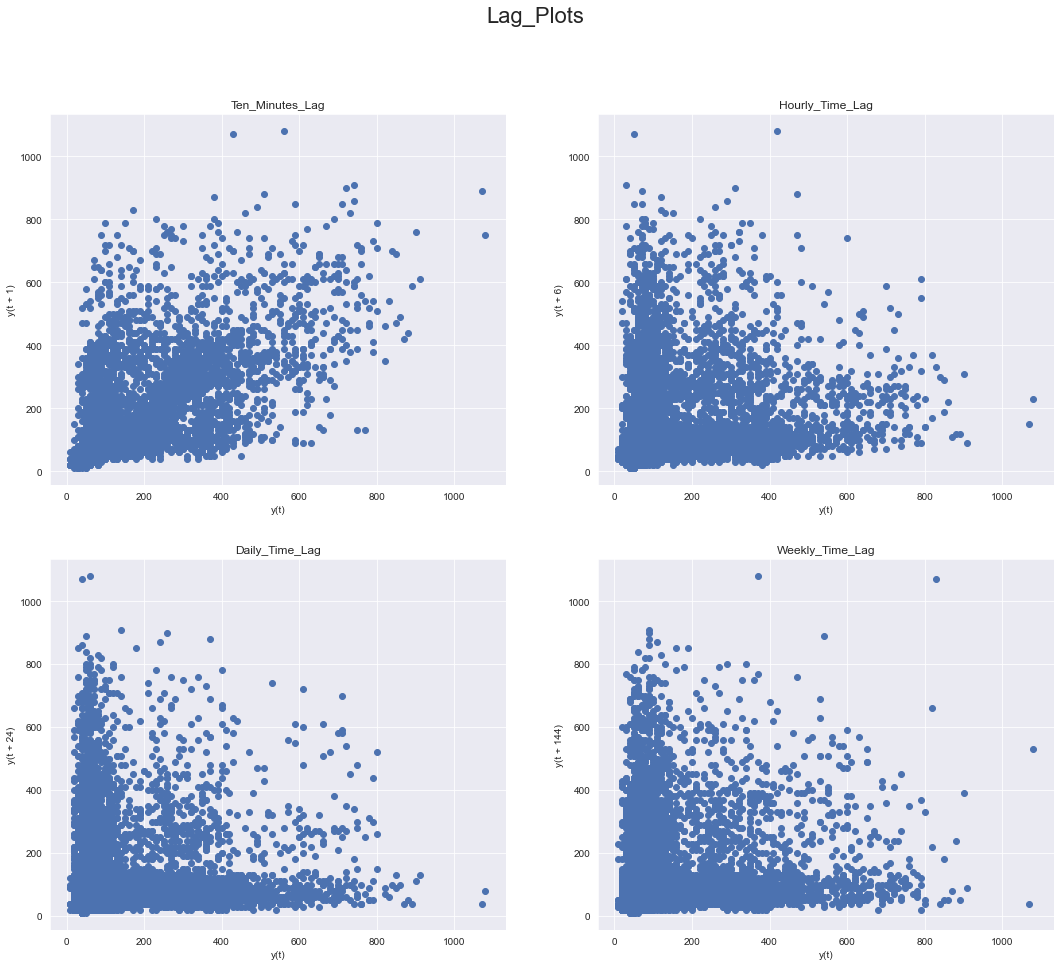

In [15]:
# We can see a very starnge kinda of divergence in all the lagplots drawn below
# I think this is due to the fluctutaion in use of appliances based on the features given, 
# the highly volatile nature of features could be the cause of the 

plt.figure(figsize = (18,15))
plt.suptitle("Lag_Plots", fontsize = 22)

plt.subplot(2,2,1)
pd.plotting.lag_plot(data["Appliances"], lag = 1) 
plt.title("Ten_Minutes_Lag")

plt.subplot(2,2,2)
pd.plotting.lag_plot(data["Appliances"], lag = 6)
plt.title("Hourly_Time_Lag")

plt.subplot(2,2,3)
pd.plotting.lag_plot(data["Appliances"], lag = 24)
plt.title("Daily_Time_Lag")

plt.subplot(2,2,4)
pd.plotting.lag_plot(data["Appliances"], lag = 144)
plt.title("Weekly_Time_Lag")

### Building LSTM Model

In [16]:
new_data = data.drop("date", axis = 1, )
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)

In [17]:
scaled_data

array([[0.04672897, 0.42857143, 0.09767442, ..., 0.25940599, 0.78155023,
        0.26544891],
       [0.04672897, 0.42857143, 0.1       , ..., 0.25721969, 0.77938343,
        0.37208289],
       [0.03738318, 0.42857143, 0.10232558, ..., 0.25303147, 0.77423787,
        0.57284766],
       ...,
       [0.24299065, 0.14285714, 0.60232558, ..., 0.91952604, 0.42709392,
        0.58397859],
       [0.38317757, 0.14285714, 0.60232558, ..., 0.90523286, 0.42815875,
        0.12637146],
       [0.39252336, 0.14285714, 0.60232558, ..., 0.89193424, 0.42793332,
        0.68239057]])

In [18]:
scaled_data.shape

(19735, 9)

In [19]:
features = scaled_data
target = scaled_data[:,0]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, shuffle = False, random_state = 0)

In [21]:
window_size = 144 # I decided to work with the daily lag
batch_size = 50
num_features = 9

train_data_gen = TimeseriesGenerator(X_train, y_train, length = window_size, sampling_rate = 1, batch_size = batch_size)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.6, shuffle = False, random_state = 0)

Val_data_gen = TimeseriesGenerator(X_val, y_val, length = window_size, sampling_rate = 1, batch_size = batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length = window_size, sampling_rate = 1, batch_size = batch_size)

In [22]:
train_data_gen[0][0].shape

(50, 144, 9)

In [23]:
train_data_gen[0][1].shape

(50,)

In [24]:
X_val.shape, X_test.shape

((1578, 9), (2369, 9))

In [25]:
X_train.shape

(15788, 9)

### Building the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LeakyReLU, LSTM

In [27]:
model = Sequential()
model.add(LSTM(256, input_shape = (window_size, num_features), return_sequences = True))
model.add(LeakyReLU(alpha = 0.5))
model.add(LSTM(128, return_sequences = True))
model.add(LeakyReLU(alpha = 0.5))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences = False))
model.add(Dropout(0.5))
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 144, 256)          272384    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 144, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 144, 128)          197120    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 144, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 144, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [30]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['MeanSquaredError'])

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "best_energy_model.hdf5"
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            monitor = "val_loss",
                            verbose = 1,
                            save_best_only = True,
                            mode = "min")

early_stopping = EarlyStopping(monitor = "val_loss", patience = 3, restore_best_weights = True)
callbacks =[checkpoint, early_stopping]

history = model.fit_generator(train_data_gen, epochs = 50, 
                              validation_data = Val_data_gen, shuffle = False, 
                              callbacks = callbacks)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00001: val_loss improved from inf to 0.00491, saving model to best_energy_model.hdf5
313/313 [==============================] - 537s 2s/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00002: val_loss improved from 0.00491 to 0.00405, saving model to best_energy_model.hdf5
313/313 [==============================] - 619s 2s/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00003: val_loss improved from 0.00405 to 0.00363, saving model to best_energy_model.hdf5
313/313 [==============================] - 583s 2s/step - loss: 0.0068 - mean_squared_error: 0.00

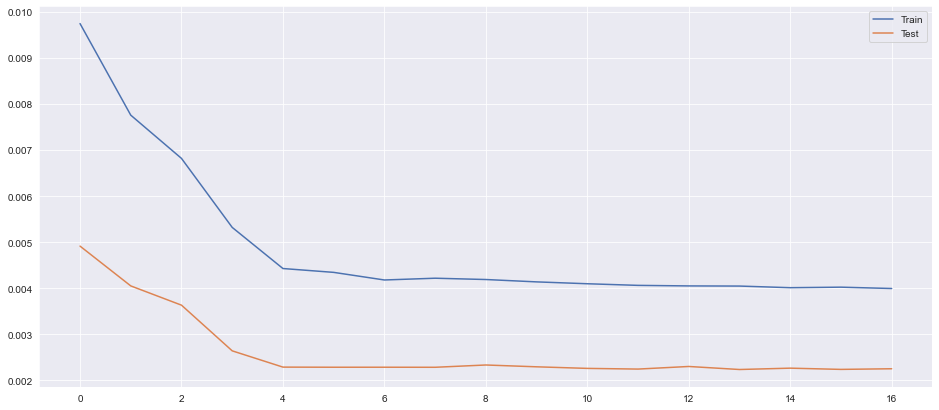

In [35]:
plt.figure(figsize = (16,7))
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")

plt.legend()
plt.show()

## Running more epoch should allow the losses to converge but that takes a lot of time and this is great for now.

In [36]:
model.evaluate(test_data_gen, verbose = 0)

[0.0035534556955099106, 0.0035534556955099106]

In [37]:
energy_pred = model.predict(test_data_gen)

In [38]:
energy_pred[:10], y_test[:10]

(array([[0.0428746 ],
        [0.03665807],
        [0.04346725],
        [0.03391958],
        [0.04606095],
        [0.03052973],
        [0.04262542],
        [0.03445419],
        [0.03852454],
        [0.0387671 ]], dtype=float32),
 array([0.06542056, 0.05607477, 0.05607477, 0.08411215, 0.37383178,
        0.24299065, 0.04672897, 0.05607477, 0.06542056, 0.06542056]))

In [39]:
energy_pred.shape

(2225, 1)

In [41]:
pred_data = pd.concat([pd.DataFrame(energy_pred), pd.DataFrame(X_test[:,1:][window_size:])], axis = 1)

In [42]:
new_pred_data = scaler.inverse_transform(pred_data)

In [44]:
new_pred_data[0]

array([ 55.87582678,   0.        , 744.3       ,   1.        ,
        17.66666667,  11.6       ,  22.27419048,  53.01947619,
        48.62106014])

In [48]:
final_data = energy_data[energy_pred.shape[0] * -1 :]

In [50]:
final_data["App_Prediction"] = new_pred_data[:,0]

In [51]:
final_data.head()

date  Appliances  lights     T1       RH_1         T2  \
17510 2016-05-12 07:20:00          50       0  24.79  47.000000  23.128571   
17511 2016-05-12 07:30:00          60      10  24.79  47.000000  23.330000   
17512 2016-05-12 07:40:00          50       0  24.79  47.030000  23.481429   
17513 2016-05-12 07:50:00          70       0  24.79  47.163333  23.854000   
17514 2016-05-12 08:00:00          50       0  24.79  47.230000  24.421429   

            RH_2         T3    RH_3     T4  ...  RH_out  Windspeed  \
17510  49.095714  26.000000  43.400  25.10  ...    99.0        1.0   
17511  48.820000  26.000000  43.400  25.10  ...    99.0        1.0   
17512  48.554286  26.020000  43.400  25.10  ...    99.0        1.0   
17513  48.220000  26.057143  43.400  25.10  ...    99.0        1.0   
17514  47.350000  26.100000  43.356  25.12  ...    99.0        1.0   

       Visibility  Tdewpoint        rv1        rv2  Temperature    Rel_Hum  \
17510   17.666667      11.60  48.621060  48.621060    22.274190  53.019476   
17511   24.000000      11.95  11.088807  11.088807    22.381333  53.010667   
17512   30.333333      12.30  49.950530  49.950530    22.460476  53.012762   
17513   36.666667      12.65  31.805716  31.805716    22.597448  53.029450   
17514   43.000000      13.00  23.443419  23.443419    22.758060  52.984550   

         rv_mean  App_Prediction  
17510  48.621060       55.875827  
17511  11.088807       49.224136  
17512  49.950530       56.509961  
17513  31.805716       46.293947  
17514  23.443419       59.285216  

[5 rows x 33 columns]

<AxesSubplot:>

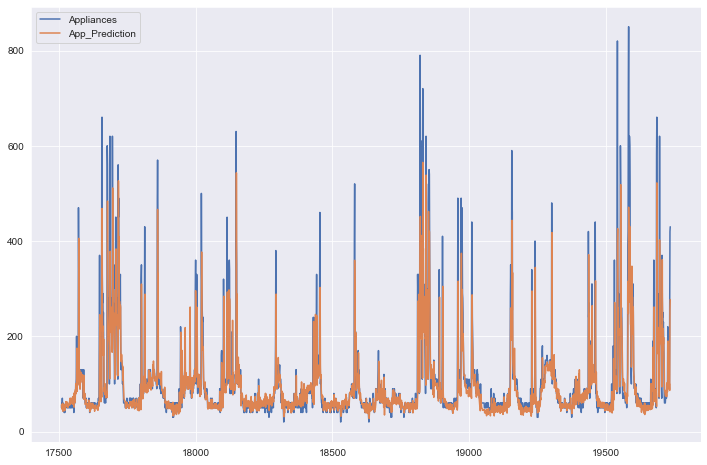

In [53]:
final_data[["Appliances", "App_Prediction"]].plot()